# Project: Investigate a Dataset (No show Appointment!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#description">Data Description</a></li>
<li><a href="#goal">Question</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset contains the details of 110,527 medical appointment with 14 associated variable and this project is aimed is identifying reasons why people missed appointment. 

<a id='description'></a>
### Data Description
1. PatientId - A unique identification number for each patient
2. AppoinmentID - A unique identification for each apointment
3. Gender - Representing the gender of the patient as either Male or Female
4. ScheduledDay - The date and time for the appointment
5. AppointmentDay - This is date and time the appointment was registered for.
6. Age - The Age of the patient
7. Neighbourhood - The location of appointment.
8. Scholarship - This show the scholarship status of patient as 1 or 0 
9. Hipertension - The hypertension status of patient as 1 or 0
10. Diabetes - This show whether the patient is diabetic or not as 1 or 0 respectively
11. Alcoholism -This show whether the patient is an alcoholic or not as 1 or 0 respectively
12. Handcap - Show the handicap status in terms of the joint as 0,1,2 and 3+
13. SMS_received - This states whether received a reminder or not.
14. No-show - This states whether the patient missed the appointment. Where Yes means the patient missed appointment while No means the patient did not miss the appointment.

<a id='goal'></a>
### This analysis is aimed at answering the following questions
1. What are the factors that contributes to patients missing appointment?
2. What are the factors that affect the scholarship status of patient?

<a id='wrangling'></a>
### Importing Library and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [27]:
df.head() #To print the first five rows in the data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
df.shape # To get the dimensions of the data

(110527, 14)

In [29]:
df.info() #To know the datatypes and number of null values we have in each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [30]:
df.nunique().sort_values() # To know the number of unique values in each columns

Gender                 2
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
SMS_received           2
No-show                2
Handcap                5
AppointmentDay        27
Neighbourhood         81
Age                  104
PatientId          62299
ScheduledDay      103549
AppointmentID     110527
dtype: int64

<a id='eda'></a>
### Exploratory Data Analysis

#### Renaming the Hipertension and Handcap Columns

In [31]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

The columns needs to be renamed for easy understanding

In [32]:
df.head(2) # To confirm that the columns has been renamed

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Univariate Analysis

In [33]:
df.Age.describe() # To understand the distribution of the Age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### Removing Age with < 0

In [34]:
n_index = df[df['Age'] < 0].index

In [35]:
df.drop(index=n_index,inplace=True)

Ages lesser than zero were removed because it's impossible to have an age lesser than zero.

In [36]:
df.shape

(110526, 14)

In [37]:
df.Age.describe() # To confirm the minimum value

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

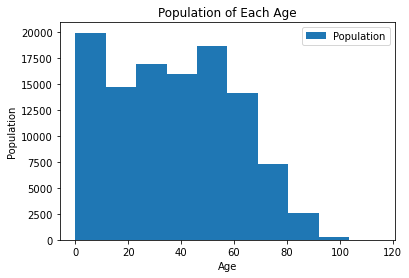

In [38]:
# Plot of the population of each age in the dataset
plt.hist(df['Age'],label = 'Population');
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend()
plt.title('Population of Each Age');

#### Creating Age Group 

In [39]:
df.loc[df['Age'] < 15 ,'Age_group'] = 'Children'
df.loc[((df['Age'] > 14) & (df['Age'] < 25)) ,'Age_group'] = 'Youth'
df.loc[(df['Age'] > 24) & (df['Age'] < 65 ),'Age_group'] = 'Adult'
df.loc[df['Age'] > 64 ,'Age_group'] = 'Aged'

In [40]:
# Count the number of entries in each age group
df['Age_group'].value_counts() 

Adult       58857
Children    23257
Aged        14402
Youth       14010
Name: Age_group, dtype: int64

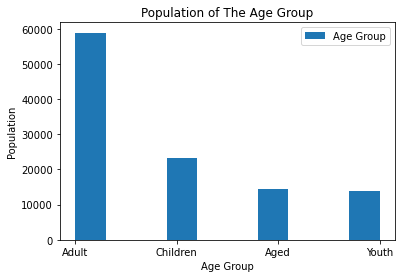

In [41]:
#plot the population of each age group
plt.hist(df['Age_group'],label = 'Age Group');
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.legend()
plt.title('Population of The Age Group');

From the above plot, it can be deduced that adult goes to the hospital more than every other age group.

In [42]:
#Print the first five appointment day 
df['AppointmentDay'].head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [43]:
#Print the last five appointment day
df['AppointmentDay'].tail()

110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, dtype: object

#### Extracting the month of each appointment

In [44]:
df['Month'] = df['AppointmentDay'].str.split('-',expand= True)[1].astype(int)

In [45]:
# Confirm datas in month column
df['Month'].head()

0    4
1    4
2    4
3    4
4    4
Name: Month, dtype: int32

In [46]:
df['Month'].value_counts()

5    80841
6    26450
4     3235
Name: Month, dtype: int64

In [47]:
# Create a value_count plot function for reusability 
def value_count_plot(column_name):
    
    df[column_name].value_counts().plot(kind = 'bar',label = column_name)
    plt.xlabel(column_name)
    plt.ylabel('Number of Appointment')
    plt.legend()

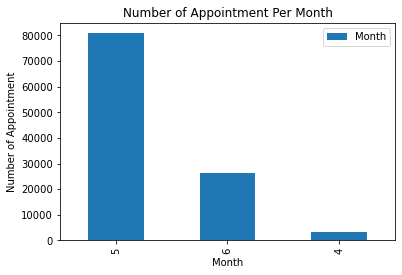

In [48]:
# Plot the months value counts
value_count_plot('Month')
plt.title('Number of Appointment Per Month');

From the plot it can be deduced that there were more appointments in May.

In [49]:
# Get the unique values in Alcoholism
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [50]:
# Get the value count in Alcoholism
df['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

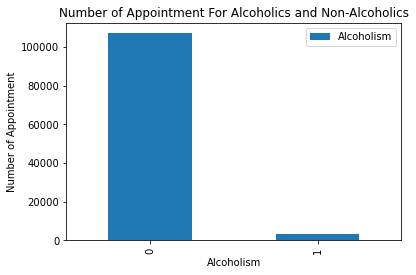

In [51]:
# plot value counts in Alcoholism
value_count_plot('Alcoholism')
plt.title('Number of Appointment For Alcoholics and Non-Alcoholics');

From the plot, more non alcoholics has more appointments than alcoholics

In [28]:
# Get the unique values in Diabetes
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [52]:
# Get the value count in Diabetes
df["Diabetes"].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

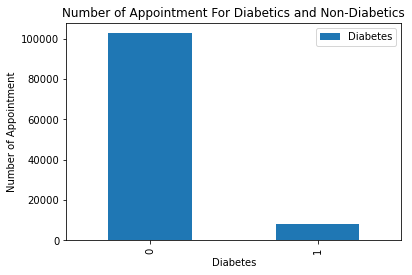

In [53]:
# plot the value counts in Diabetes
value_count_plot('Diabetes')
plt.title('Number of Appointment For Diabetics and Non-Diabetics');

From the plot, it can be deduced that more non-diabetics has more appointment than diabetics

In [54]:
# Get the unique values in Gender
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [55]:
# Get the value counts in Gender
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

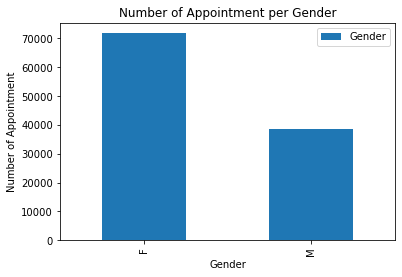

In [56]:
# Plot the value counts in Gender
value_count_plot('Gender')
plt.title('Number of Appointment per Gender');

From the plot, females has more appointment than males

In [57]:
# Get the unique values in Handicap
df['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [58]:
# Get the value counts in Handicap
df['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

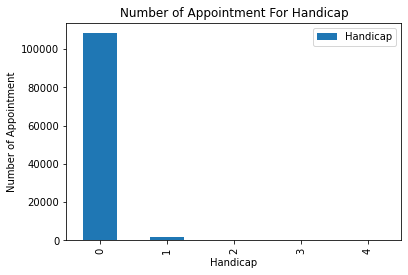

In [59]:
# Plot the value counts in Handicap
value_count_plot('Handicap');
plt.title('Number of Appointment For Handicap');

Only few handicap has an appointment

In [60]:
# Get the unique values in Hypertension
df['Hypertension'].unique()

array([1, 0], dtype=int64)

In [61]:
# Get the value counts in Hypertension
df['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

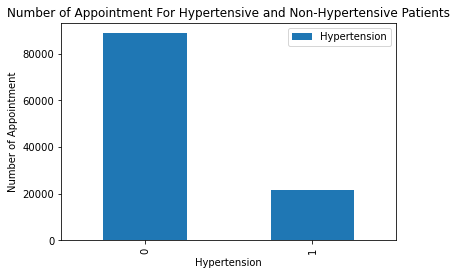

In [62]:
# plot the value counts in Hypertension
value_count_plot('Hypertension')
plt.title('Number of Appointment For Hypertensive and Non-Hypertensive Patients');

There are more non-hypertensive patient than hypertensive.

In [63]:
# Get the number of unique values in Neighbourhood
df['Neighbourhood'].nunique()

81

In [64]:
# Get the first ten rows in Neighbourhood
df['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64

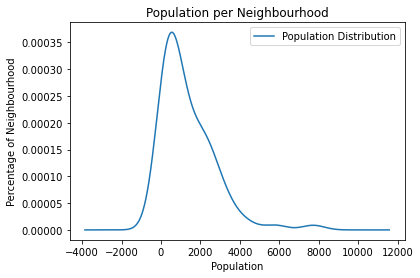

In [65]:
# Plot a distribution plot of the population in every neighbourhood
df['Neighbourhood'].value_counts().plot(kind='kde',label = 'Population Distribution');
plt.xlabel('Population')
plt.ylabel('Percentage of Neighbourhood')
plt.legend()
plt.title('Population per Neighbourhood');

In [66]:
#Counting the number of appointmrnt in each neighbourhood
(df['Neighbourhood'].value_counts()).sort_values()

PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         8
ILHA DO FRADE                    10
ILHA DO BOI                      35
                               ... 
ITARARÉ                        3514
JARDIM DA PENHA                3877
RESISTÊNCIA                    4431
MARIA ORTIZ                    5805
JARDIM CAMBURI                 7717
Name: Neighbourhood, Length: 81, dtype: int64

In [67]:
# Calculating the average appointments in each number
(df['Neighbourhood'].value_counts()).mean()

1364.5185185185185

In [68]:
# Counting numbers of Neighbourhood with more than 2000 appointment
((df['Neighbourhood'].value_counts()) > 2000).sum()

21

From the analysis that most, it can be deduced that about 75% of the Neighbourhood has a less than 2000 patients 

In [69]:
# getting the unique values in sms_received
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [70]:
# getting the value counts in sms_received
df['SMS_received'].unique()
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

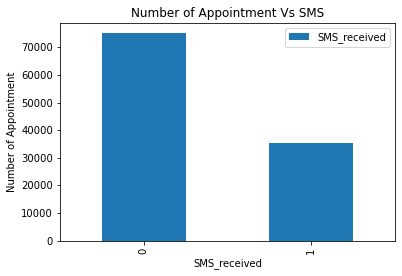

In [71]:
# Plotting the value counts plot for sms received
value_count_plot('SMS_received')
plt.title('Number of Appointment Vs SMS');

Fewer people received sms

In [72]:
# getting number of unique values in schedule day
df['ScheduledDay'].nunique()

103548

In [60]:
# Unique scholaship status
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [73]:
# Population in each scholarship status category
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

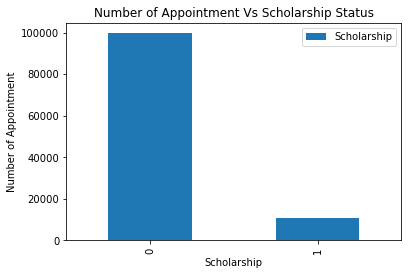

In [74]:
#Plot of the population in each scholarship status category
value_count_plot('Scholarship')
plt.title('Number of Appointment Vs Scholarship Status');

There are less scholarship receipent among the patients 

In [75]:
# Unique values in No-show column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [76]:
# Count of each category in no-show column
df['No-show'].value_counts(normalize= True)

No     0.798066
Yes    0.201934
Name: No-show, dtype: float64

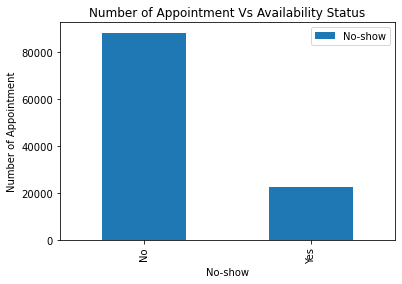

In [77]:
# Plot of the count of each category in no-show column
value_count_plot('No-show')
plt.title('Number of Appointment Vs Availability Status');

 79.8% were present for their appointment

### Bi Variate Analysis

#### What gender is likely to miss an appointment?

In [78]:
# Classifying gender based on missing appointment
gender = df[['Gender','No-show']].groupby('No-show')

In [79]:
# Counting the percentage distribution of missing appointment for both gender
gender.get_group('Yes')['Gender'].value_counts(normalize=True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

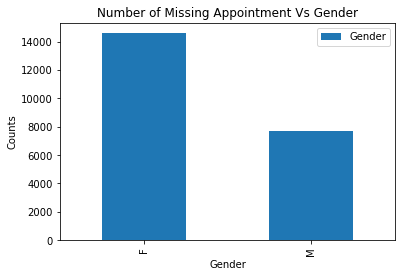

In [102]:
gender.get_group('Yes')['Gender'].value_counts().plot(kind='bar',label = 'Gender');
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.legend()
plt.title('Number of Missing Appointment Vs Gender');

A female is likely to miss an appointment.

#### What effect does age group has on absence on both genders?

In [80]:
# Grouping each patients gender and age group based on whether or not they miss an appointment
gender_age = df[['Gender','Age_group','No-show']].groupby('No-show')

In [81]:
# Extracting the age group and gender for those that missed appointment
gender_agegrp = gender_age.get_group('Yes')[['Gender','Age_group']]


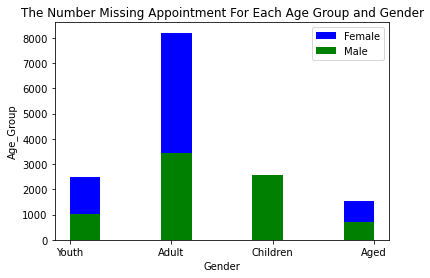

In [82]:
# Plotting the distribution for the gender in each age group that missed appointment
plt.hist(gender_agegrp.Age_group[gender_agegrp.Gender == 'F'],facecolor = 'b',label = 'Female')
plt.hist(gender_agegrp.Age_group[gender_agegrp.Gender == 'M'],facecolor = 'g',label = 'Male')
plt.xlabel('Gender')
plt.ylabel('Age_Group')
plt.legend()
plt.title('The Number Missing Appointment For Each Age Group and Gender');

An aged is less likely to miss an appointment while more adults miss appointment 


Female children did not have any appointment

#### Are scholarship receipents missing more appointment than those not receiving scholarship?

In [83]:
# Grouping the scholarship and No-show entries 
scholarship  = df[['Scholarship','No-show']].groupby('No-show')

In [84]:
# Extracting the distribution of scholarship status for those that missed thier appointment
scholarship.get_group('Yes')['Scholarship'].value_counts(normalize=True)

0    0.884493
1    0.115507
Name: Scholarship, dtype: float64

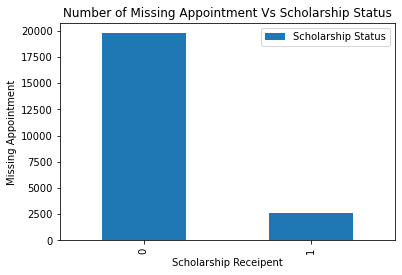

In [85]:
# Plot the value counts of the scholarship status for missed appointment
scholarship.get_group('Yes')['Scholarship'].value_counts().plot(kind='bar',label = 'Scholarship Status');
plt.xlabel('Scholarship Receipent')
plt.ylabel('Missing Appointment')
plt.legend()
plt.title('Number of Missing Appointment Vs Scholarship Status');

Scholarship receipent miss fewer appointments compared to non-receipient

#### What criteria is used to select scholarship receipent?

In [86]:
# Creating a subset data for scholarship, hypertension, diabetes, and age group 
sch_hyp_dia_age = df[['Scholarship','Hypertension','Diabetes','Age_group']].groupby('Scholarship')

In [87]:
# extracting the age group and hypertension status for receipent of scholarship
sch_hyp_age= sch_hyp_dia_age.get_group(1)[['Hypertension','Age_group']]

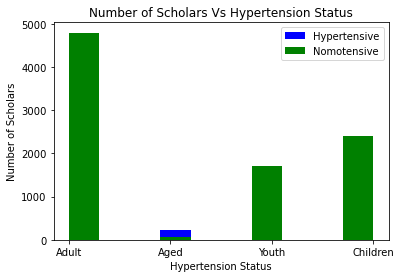

In [88]:
# Plotting the age group and hypertension status of scholars
plt.hist(sch_hyp_age.Age_group[sch_hyp_age.Hypertension == 1],facecolor='b',label='Hypertensive')
plt.hist(sch_hyp_age.Age_group[sch_hyp_age.Hypertension == 0],facecolor='g',label='Nomotensive')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Scholars')
plt.legend()
plt.title('Number of Scholars Vs Hypertension Status');

From the plot, 
1. it can be deduced that aside the aged individuals non of the other age group among the receipient of the scholarship are hypertensive 
2. The aged are monority among the scholarship receipient


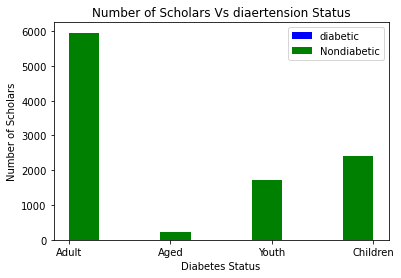

In [89]:
# Extracting and plotting diabetes and hypertension status of scholars
sch_dia_age= sch_hyp_dia_age.get_group(1)[['Diabetes','Age_group']]
plt.hist(sch_dia_age.Age_group[sch_dia_age.Diabetes == 1],facecolor='b',label='diabetic')
plt.hist(sch_dia_age.Age_group[sch_dia_age.Diabetes == 0],facecolor='g',label='Nondiabetic')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Scholars')
plt.legend()
plt.title('Number of Scholars Vs diaertension Status');

Non of the scholarship receipient is diabetic

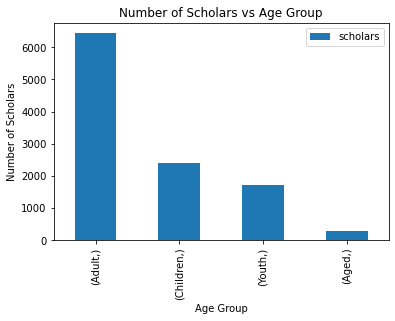

In [90]:
# Extracting and plotting the value count of the scholars age group 
sch_hyp_dia_age.get_group(1)[['Age_group']].value_counts().plot(kind='bar',label = 'scholars');
plt.xlabel('Age Group')
plt.legend()
plt.ylabel('Number of Scholars')
plt.title('Number of Scholars vs Age Group');

#### From the analysis, the following can be deduced 
1. Adults are the most populous receipient of the scholarship and the Aged are only given the scholarship if they have Hypertension.  
2. No scholarship receipient is diabetic.
3. Only aged receipient of the scholarship has some hypertensive patient 

#### Did hypertensive patients miss more appointment?

In [92]:
# Creating a subset data for hypertension and No-show
hypertension  = df[['Hypertension','No-show']].groupby('Hypertension')

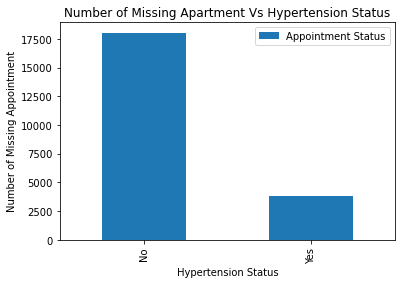

In [93]:
# Plotting the value counts of missing appointment for hypertensive patients
hypertension.get_group(1)['No-show'].value_counts().plot(kind='bar',label = 'Appointment Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Missing Appointment')
plt.legend()
plt.title('Number of Missing Apartment Vs Hypertension Status');

No, hypertensive patients did not miss a most of the appointment

#### What age group has more hypertension?

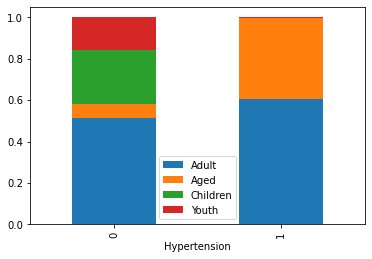

In [94]:
# Plotting the counts in each age group for hypertensive and monotensive patients
df[['Hypertension','Age_group']].groupby('Hypertension')['Age_group'].value_counts(normalize=True).unstack('Age_group').plot.bar(stacked=True)
plt.legend();

Hypertensive patient are either Aged or Adult

In [95]:
# Creating a subset for hypertension status and age group
hyper_age  = df[['Hypertension','Age_group']].groupby('Hypertension')

In [98]:
# Calculating the percentage of hypertensive patients from each age group
hyper_age.get_group(1)['Age_group'].value_counts(normalize=True)

Adult       0.603826
Aged        0.391588
Youth       0.003670
Children    0.000917
Name: Age_group, dtype: float64

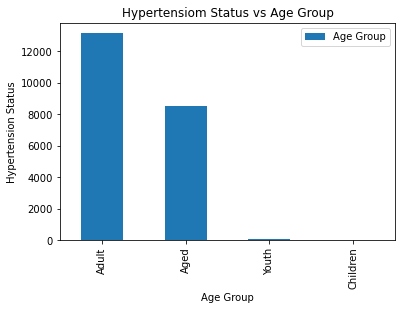

In [97]:
#plotting the value counts of hypertensive patients in each age group
hyper_age.get_group(1)['Age_group'].value_counts().plot(kind='bar',label='Age Group');
plt.xlabel('Age Group')
plt.ylabel('Hypertension Status')
plt.legend()
plt.title('Hypertensiom Status vs Age Group');

More than 60% of the hypertensive patients are adults

#### Did most hypertensive patient have diabetes? 

In [99]:
# Create a subset data for hypertension and diabetes status
hyper_dia  = df[['Hypertension','Diabetes']].groupby('Hypertension')

In [100]:
# Value count of the diabetes status for hypertensive patients
hyper_dia.get_group(1)['Diabetes'].value_counts(normalize=True)

0    0.702491
1    0.297509
Name: Diabetes, dtype: float64

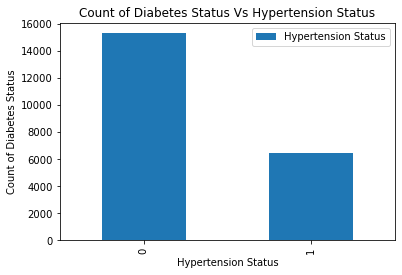

In [101]:
# Plot of the value count of the diabetes status for hypertensive patients 
hyper_dia.get_group(1)['Diabetes'].value_counts().plot(kind='bar',label = 'Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Count of Diabetes Status')
plt.legend()
plt.title('Count of Diabetes Status Vs Hypertension Status');

No, a larger percentage of hypertensive patients did not have diabetes

#### what percentage of hypertensive patients takes alcohol?

In [104]:
# Create a subset data for hypertension and Alcoholism status
hyper_alc = df[['Hypertension','Alcoholism']].groupby('Hypertension')

In [105]:
# Value count percentage of the Alcoholism status for hypertensive patients
hyper_alc.get_group(1)['Alcoholism'].value_counts(normalize=True)

0    0.939131
1    0.060869
Name: Alcoholism, dtype: float64

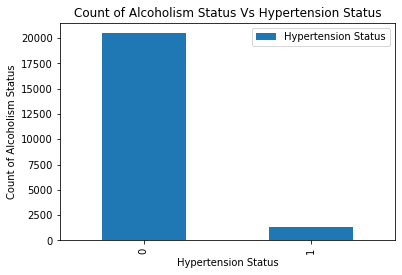

In [106]:
# Plotting the value count percentage of the Alcoholism status for hypertensive patients
hyper_alc.get_group(1)['Alcoholism'].value_counts().plot(kind='bar',label ='Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Count of Alcoholism Status')
plt.legend()
plt.title('Count of Alcoholism Status Vs Hypertension Status');

 6.09 % of Hypertensive patients takes alcohol 

#### How many diabetic patients miss their appointment?

In [169]:
diabetes  = df[['Diabetes','No-show']].groupby('Diabetes')

In [170]:
diabetes.get_group(1)['No-show'].value_counts()

No     6513
Yes    1430
Name: No-show, dtype: int64

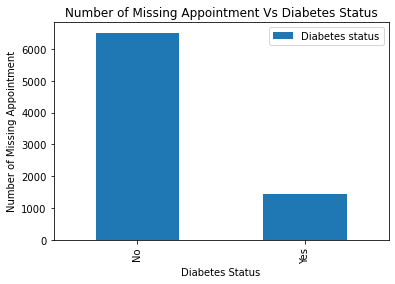

In [172]:
diabetes.get_group(1)['No-show'].value_counts().plot(kind='bar',label = 'Diabetes status')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Missing Appointment')
plt.legend()
plt.title('Number of Missing Appointment Vs Diabetes Status');

1430 diabetic patients missed thier appointmen

#### What percentage of alcoholics are diabetic?

In [173]:
dia_alc  = df[['Diabetes','Alcoholism']].groupby('Alcoholism')

In [174]:
dia_alc.get_group(1)['Diabetes'].value_counts(normalize=True)

0    0.90119
1    0.09881
Name: Diabetes, dtype: float64

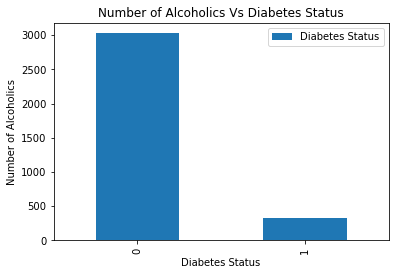

In [176]:
dia_alc.get_group(1)['Diabetes'].value_counts().plot(kind='bar',label = 'Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Alcoholics')
plt.legend()
plt.title('Number of Alcoholics Vs Diabetes Status');

 9.88 % of alcoholics are diabetic

#### Did Alcoholics miss more appointment than non-alcoholics?

In [177]:
alcoholism  = df[['Alcoholism','No-show']].groupby('No-show')

In [178]:
alcoholism.get_group('Yes')['Alcoholism'].value_counts()

0    21642
1      677
Name: Alcoholism, dtype: int64

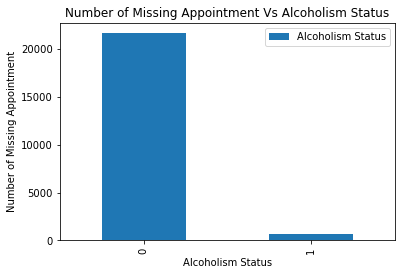

In [179]:
alcoholism.get_group('Yes')['Alcoholism'].value_counts().plot(kind='bar',label = 'Alcoholism Status')
plt.xlabel('Alcoholism Status')
plt.ylabel('Number of Missing Appointment')
plt.legend()
plt.title('Number of Missing Appointment Vs Alcoholism Status');

No, there are more Non - alcoholics that missed their appointment than alcoholics

#### What was the effect of the sms on patients appointment?

In [180]:
sms = df[['SMS_received','No-show']].groupby('No-show')

In [181]:
sms.get_group('No')['SMS_received'].value_counts()

0    62509
1    25698
Name: SMS_received, dtype: int64

In [182]:
sms.get_group('Yes')['SMS_received'].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

 The sms decreases the number of patients that missed thier meeting.

#### What is the percentage of missing appointments for each handicap?

In [183]:
handicap = df[['Handicap','No-show']].groupby('No-show')

In [184]:
handicap.get_group('No')['Handicap'].value_counts(normalize=True)

0    0.979208
1    0.019001
2    0.001655
3    0.000113
4    0.000023
Name: Handicap, dtype: float64

In [185]:
handicap.get_group('Yes')['Handicap'].value_counts(normalize=True)

0    0.981764
1    0.016399
2    0.001658
3    0.000134
4    0.000045
Name: Handicap, dtype: float64

Although, there are fewer handicaps in the data and about 0.02% of those that missed thier appointment are handicaps 

#### What age group are the most diabetic?

In [186]:
age_diabetes = df[['Age_group','Diabetes']].groupby('Diabetes')

In [187]:
age_diabetes.get_group(1)['Age_group'].value_counts(normalize=True)

Adult       0.565152
Aged        0.423392
Youth       0.009065
Children    0.002392
Name: Age_group, dtype: float64

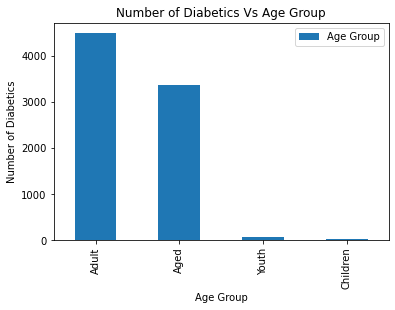

In [189]:
age_diabetes.get_group(1)['Age_group'].value_counts().plot(kind='bar',label = 'Age Group');
plt.xlabel('Age Group')
plt.ylabel('Number of Diabetics')
plt.legend()
plt.title('Number of Diabetics Vs Age Group');

 Most diabetics patients are either adults or aged

#### What Gender and Age Group Are More Likely to Have Diabetes

In [190]:
gender_diabetes = df[['Gender','Diabetes']].groupby('Diabetes')

In [191]:
gender_diabetes.get_group(1)['Gender'].value_counts()

F    5606
M    2337
Name: Gender, dtype: int64

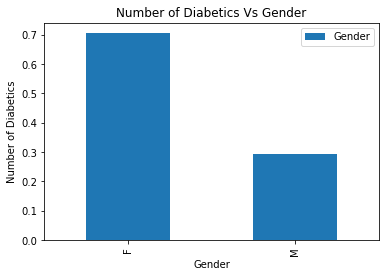

In [192]:
gender_diabetes.get_group(1)['Gender'].value_counts(normalize=True).plot(kind = 'bar',label ='Gender');
plt.xlabel('Gender')
plt.ylabel('Number of Diabetics')
plt.legend()
plt.title('Number of Diabetics Vs Gender');

In [196]:
age_dia_gen = df[['Age_group','Diabetes','Gender']].groupby('Diabetes')
age_gender = age_dia_gen.get_group(1)[['Age_group','Gender']]

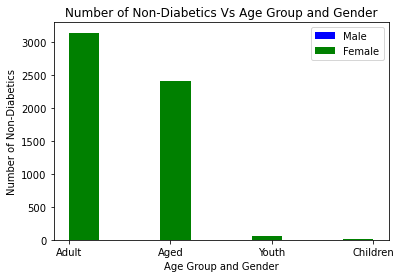

In [197]:
plt.hist(age_gender.Age_group[age_gender.Gender == 'M'],facecolor = 'b',label='Male')
plt.hist(age_gender.Age_group[age_gender.Gender == 'F'],facecolor = 'g',label='Female')
plt.xlabel('Age Group and Gender')
plt.ylabel('Number of Non-Diabetics')
plt.legend()
plt.title('Number of Non-Diabetics Vs Age Group and Gender');

#### From the plot above, it can be deduced
1. Most diabetic patients are above 24(Youth age) and are mostly females
2. There are more female diabetic patient than male diabetic patient

#### Does taking alcohol causes diabetes? 

In [199]:
diabetes_alcohol = df[['Diabetes','Alcoholism']].groupby('Alcoholism')

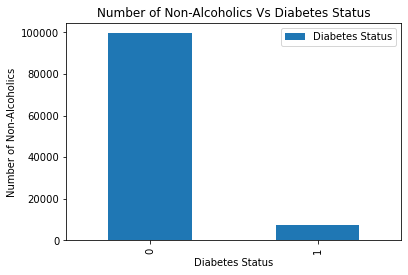

In [200]:
diabetes_alcohol.get_group(0)['Diabetes'].value_counts().plot(kind='bar',label = 'Diabetes Status');
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Non-Alcoholics')
plt.legend()
plt.title('Number of Non-Alcoholics Vs Diabetes Status');

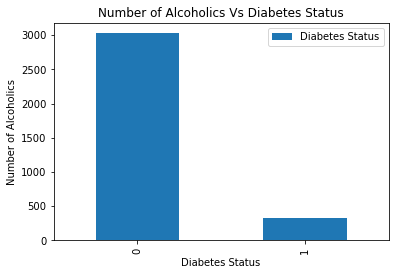

In [201]:
diabetes_alcohol.get_group(1)['Diabetes'].value_counts().plot(kind='bar',label = 'Diabetes Status');
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Alcoholics')
plt.legend()
plt.title('Number of Alcoholics Vs Diabetes Status');

Taking alcohol does not lead to diabetes

#### Does taking alcohol lead to hypertension?

In [202]:
hyper_alcohol = df[['Hypertension','Alcoholism']].groupby('Alcoholism')

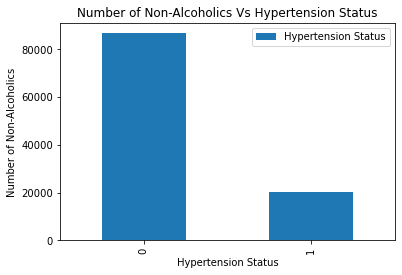

In [205]:
hyper_alcohol.get_group(0)['Hypertension'].value_counts().plot(kind='bar',label = 'Hypertension Status');
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Non-Alcoholics')
plt.legend()
plt.title('Number of Non-Alcoholics Vs Hypertension Status');

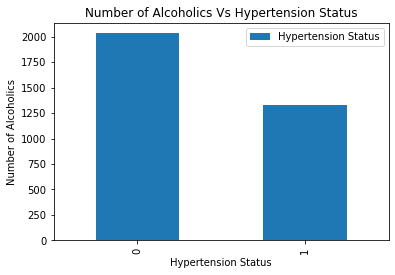

In [206]:
hyper_alcohol.get_group(1)['Hypertension'].value_counts().plot(kind='bar',label = 'Hypertension Status');
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Alcoholics')
plt.legend()
plt.title('Number of Alcoholics Vs Hypertension Status');

 Taking Alcohol increases the chances of having hypertension

#### Are patients with hypertension and diabetes likely to miss an appointment?

In [228]:
hyper_dia_miss = df[['Hypertension','Diabetes','No-show']].groupby('No-show')
hyper_dia = hyper_dia_miss.get_group('Yes')[['Hypertension','Diabetes']]

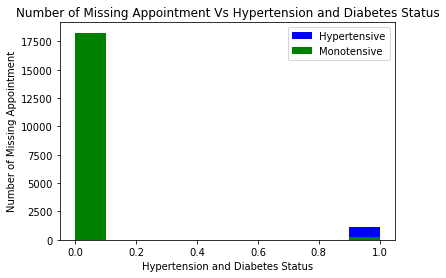

In [214]:
plt.hist(hyper_dia.Diabetes[hyper_dia.Hypertension == 1],facecolor='b',label = 'Hypertensive')
plt.hist(hyper_dia.Diabetes[hyper_dia.Hypertension == 0],facecolor='g',label = 'Monotensive')
plt.xlabel('Hypertension and Diabetes Status')
plt.ylabel('Number of Missing Appointment')
plt.legend()
plt.title('Number of Missing Appointment Vs Hypertension and Diabetes Status');

Patients suffering from hypertension and diabetes does not determine the patients availability for an appointment

#### Top Ten Neighbourhood That Miss Their Appointments

In [220]:
Neigh_Nos = df[['No-show','Neighbourhood']].groupby('No-show').head()

In [216]:
Neigh_Nos.get_group('Yes')['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: Neighbourhood, dtype: int64

In [217]:
Neigh_Nos.get_group('No')['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
CENTRO             2631
ITARARÉ            2591
TABUAZEIRO         2559
SANTO ANTÔNIO      2262
BONFIM             2223
Name: Neighbourhood, dtype: int64

 From the analysis above it can be deduced that more people in each neighbourhood missed their appointments.

#### What Neighbourhoods are the most populous?

In [222]:
df['Neighbourhood'].value_counts(normalize=True)

JARDIM CAMBURI                 0.069821
MARIA ORTIZ                    0.052522
RESISTÊNCIA                    0.040090
JARDIM DA PENHA                0.035078
ITARARÉ                        0.031793
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: Neighbourhood, Length: 81, dtype: float64

In [223]:
df['Neighbourhood'].value_counts().head(15)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2746
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
Name: Neighbourhood, dtype: int64

In [224]:
df['Neighbourhood'].value_counts().tail(15)

ANTÔNIO HONÓRIO                271
FRADINHOS                      258
ENSEADA DO SUÁ                 235
SANTA HELENA                   178
HORTO                          175
UNIVERSITÁRIO                  152
SEGURANÇA DO LAR               145
NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: Neighbourhood, dtype: int64

#### Which Neighbourhood has the highest number of Alcoholics?

In [225]:
neigh_alcohol = df[['Alcoholism','Neighbourhood']].groupby('Alcoholism')

In [226]:
neigh_alcohol.get_group(1)['Neighbourhood'].value_counts().head(1)

SANTA MARTHA    344
Name: Neighbourhood, dtype: int64

Santa Martha has the highest number of Alcoholics

<a id='conclusions'></a>
### Conclusions:


#### From the above analysis, it can be concluded that:
1. The gender, age group, scholarship status, hypertension status and diabetest status contribute to the factors affecting patient availability for an appointment.
2. The age group and diabetes status largely contributes to the scholarship status of patients

#### Limitations
1. The dataset is imbalance for most of the categorical variables.
2. The dataset starts towards the end of March and very early in May which makes it difficult to have a clearer picture of the average appointment per month.

In [227]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'No_Show_Appointment.ipynb'])

1